Import required libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

Read dataset

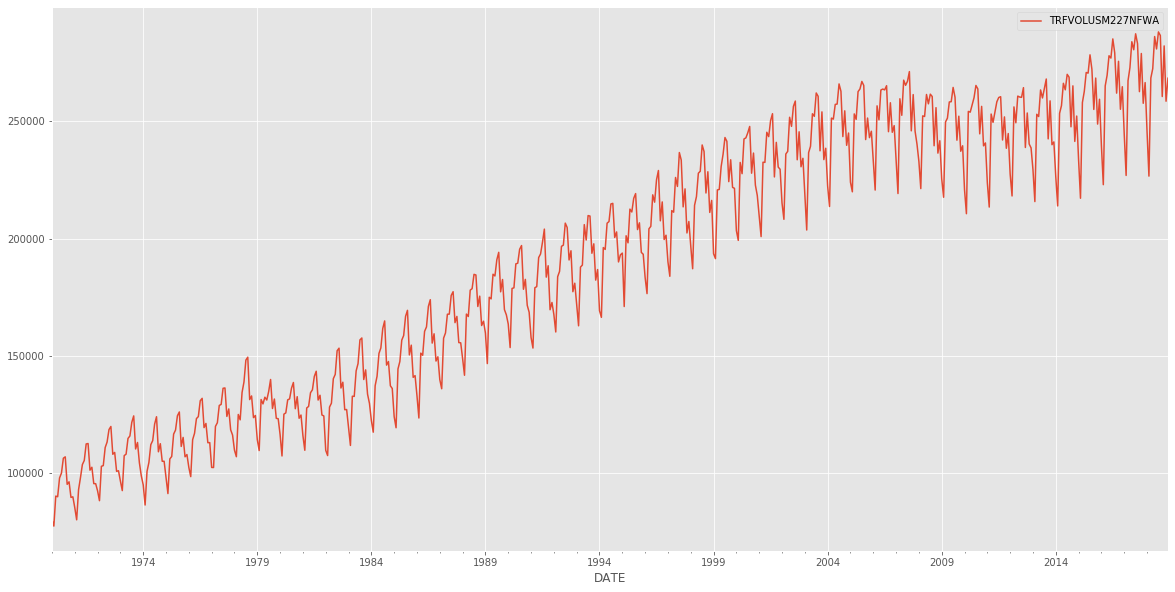

In [3]:
traveled_data = pd.read_csv('datasets_623780_1120494_Miles_Traveled.csv')
traveled_data['DATE']=pd.to_datetime(traveled_data['DATE'])
traveled_data.set_index('DATE', inplace=True)

traveled_data.plot()

the scatterplot

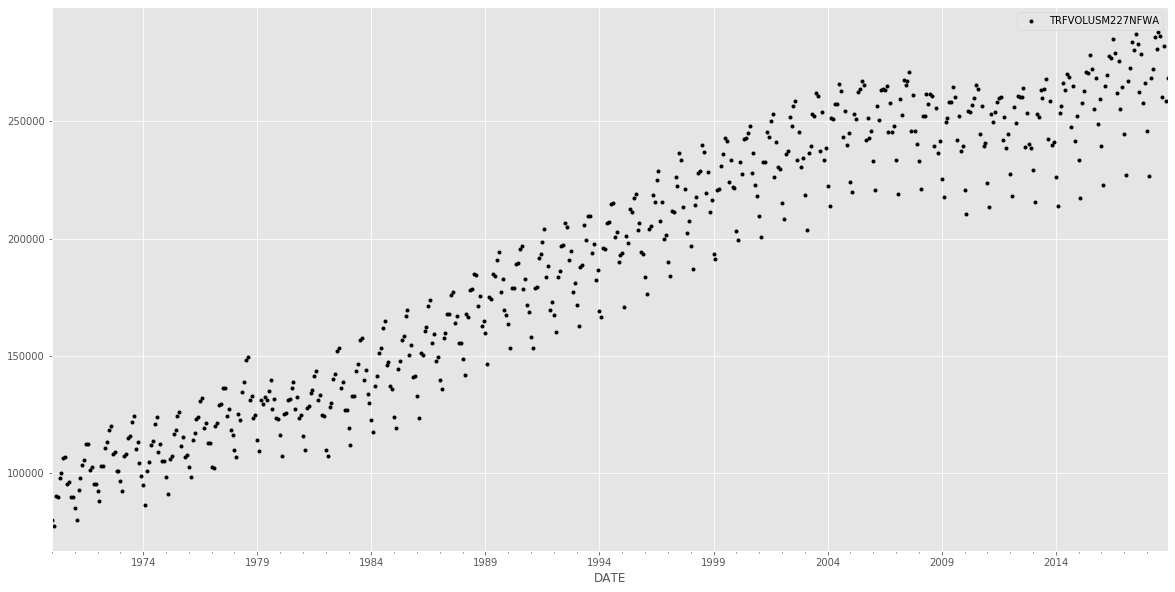

In [4]:
traveled_data.plot(style = 'k.')

Decomposition

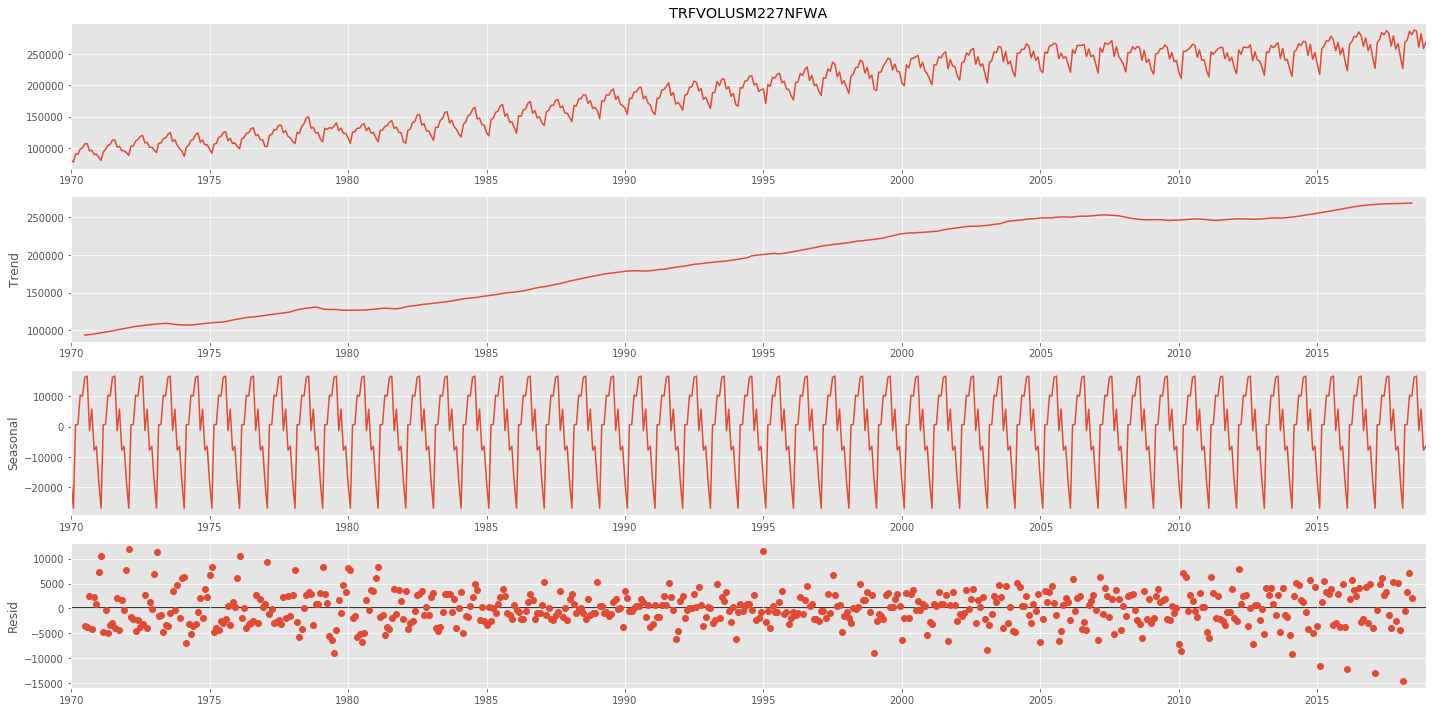

In [5]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(traveled_data['TRFVOLUSM227NFWA'], model = 'additive')

x = decomposed.plot()

The ARIMA model for time series forecasting

In [7]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 

fit auto_arima function

In [8]:
stepwise_fit = auto_arima(traveled_data['TRFVOLUSM227NFWA'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True) 

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=10934.098, BIC=10955.870, Fit time=1.919 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=11050.516, BIC=11059.225, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=10962.998, BIC=10980.416, Fit time=0.533 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=10932.344, BIC=10949.762, Fit time=0.530 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=10903.505, BIC=10925.277, Fit time=0.828 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=10955.456, BIC=10972.874, Fit time=0.614 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=10901.110, BIC=10927.236, Fit time=2.961 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=10902.472, BIC=10932.953, Fit time=3.915 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=10965.585, BIC=10987.357, Fit time=2.170 seconds
Fit ARIMA:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  588
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -5441.941
Date:                            Mon, 15 Jun 2020   AIC                          10897.882
Time:                                    09:28:02   BIC                          10928.363
Sample:                                         0   HQIC                         10909.770
                                            - 588                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -17.0867     99.900     -0.171      0.864    -212.888     178.714
ar.L1         -0.9563      0.026    -36.364      0.000      -1.008      -0.905
ma.L1          0.7121      0.025     28.913      0.000       0.664       0.760
ma.L2         -0.2712      0.011    -25.301      0.000      -0.292      -0.250
ma.S.L12      -0.3367      0.024    -14.084      0.000      -0.384      -0.290
ma.S.L24      -0.1764      0.016    -11.268      0.000      -0.207      -0.146
sigma2      9.803e+06      0.005   1.85e+09      0.000     9.8e+06     9.8e+06
===================================================================================
Ljung-Box (Q):                      119.89   Jarque-Bera (JB):               424.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.70
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.71e+24. Standard errors may be unstable.
"""

Split data into train and test sets

In [9]:
train = traveled_data.iloc[:len(traveled_data) - 12]
test = traveled_data.iloc[len(traveled_data) - 12 :]

#Fit A SARIMAX (0, 1, 1) x (2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['TRFVOLUSM227NFWA'],
               order = (0, 1, 1),
               seasonal_order = (2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   TRFVOLUSM227NFWA   No. Observations:                  576
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5332.379
Date:                            Mon, 15 Jun 2020   AIC                          10674.759
Time:                                    09:38:11   BIC                          10696.425
Sample:                                01-01-1970   HQIC                         10683.217
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2510      0.009    -26.566      0.000      -0.270      -0.232
ar.S.L12       0.2961      0.049      6.054      0.000       0.200       0.392
ar.S.L24      -0.0850      0.019     -4.584      0.000      -0.121      -0.049
ma.S.L12      -0.6471      0.055    -11.734      0.000      -0.755      -0.539
sigma2       1.01e+07   1.36e-09   7.45e+15      0.000    1.01e+07    1.01e+07
===================================================================================
Ljung-Box (Q):                      122.55   Jarque-Bera (JB):               326.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.62
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+31. Standard errors may be unstable.
"""

Predictions of ARIMA against the test set

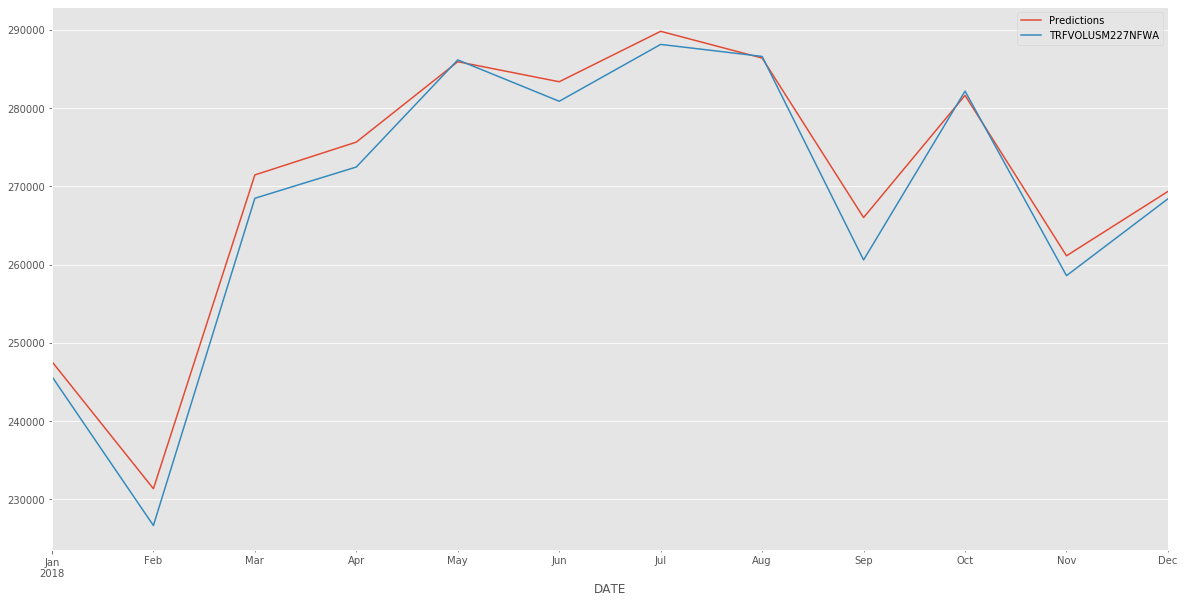

In [10]:
start = len(train)
end = len(train) + len(test) - 1

#Predictions for one-year against the test set

predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

#plot predictions and actual values

predictions.plot(legend = True)
test['TRFVOLUSM227NFWA'].plot(legend = True)


Evaluate the model using MSE and RMSE

In [11]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

#Calculate root mean squared error
rmse(test['TRFVOLUSM227NFWA'], predictions)


2752.797982734548

Calculate mean squared error

In [12]:
mean_squared_error(test['TRFVOLUSM227NFWA'], predictions)

7577896.733747397

Forecasting using ARIMA

In [15]:
model = model = SARIMAX(traveled_data['TRFVOLUSM227NFWA'], order = (0, 1, 1), seasonal_order = (2, 1, 1, 12))
result = model.fit()

Forecast for the next 3 years

In [17]:
forecast = result.predict(start = len(traveled_data), end = (len(traveled_data) - 1) + 3 * 12,
                          typ = 'levels').rename('Forecast')

Plot the forecast values

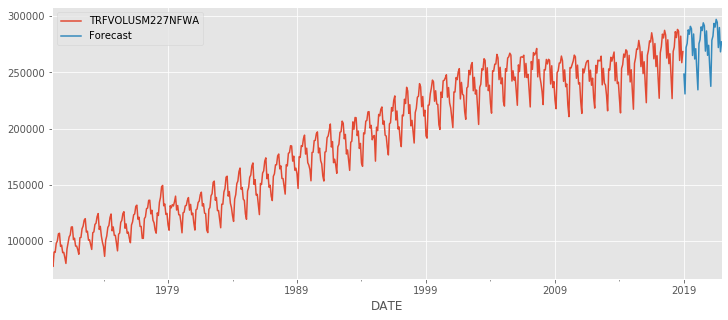

In [19]:
traveled_data['TRFVOLUSM227NFWA'].plot(figsize = (12, 5), legend = True)

forecast.plot(legend = True)

Normalizing the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

Creating LSTM model

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [24]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
564/564 [==============================] - 22s 38ms/step - loss: 0.0133
Epoch 2/20
564/564 [==============================] - 21s 37ms/step - loss: 0.0061
Epoch 3/20
564/564 [==============================] - 20s 35ms/step - loss: 0.0042
Epoch 4/20
564/564 [==============================] - 19s 34ms/step - loss: 0.0031
Epoch 5/20
564/564 [==============================] - 20s 35ms/step - loss: 0.0016
Epoch 6/20
564/564 [==============================] - 21s 36ms/step - loss: 0.0012
Epoch 7/20
564/564 [==============================] - 21s 38ms/step - loss: 0.0010
Epoch 8/20
564/564 [==============================] - 22s 39ms/step - loss: 8.4151e-04
Epoch 9/20
564/564 [==============================] - 22s 38ms/step - loss: 9.1362e-04
Epoch 10/20
564/564 [==============================] - 20s 35ms/step - loss: 9.0065e-04
Epoch 11/20
564/564 [==============================] - 21s 38ms/step - loss: 8.6482e-04
Epoch 12/20
564/564 [==============================] - 20s 36ms/step 

Visualizing

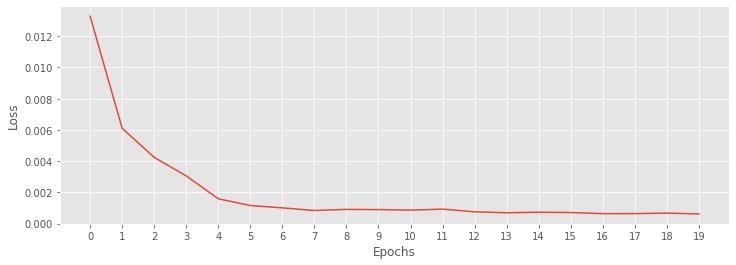

In [25]:
import numpy as np
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [27]:
lstm_predictions_scaled = list()

batch = scaled_train[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [28]:
lstm_predictions_scaled

[array([0.8045842], dtype=float32),
 array([0.7306617], dtype=float32),
 array([0.89366883], dtype=float32),
 array([0.9278433], dtype=float32),
 array([0.97400457], dtype=float32),
 array([0.9651862], dtype=float32),
 array([0.98854226], dtype=float32),
 array([0.97120744], dtype=float32),
 array([0.8899149], dtype=float32),
 array([0.9461859], dtype=float32),
 array([0.8658628], dtype=float32),
 array([0.8934009], dtype=float32)]

In [29]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions 

array([[246325.02924532],
       [230808.61944205],
       [265023.98116869],
       [272197.23078007],
       [281886.53254849],
       [280035.544092  ],
       [284938.00865167],
       [281299.41284233],
       [264236.02118289],
       [276047.36383778],
       [259187.46480578],
       [264967.74388862]])

In [30]:
test['LSTM_Predictions'] = lstm_predictions
test

,TRFVOLUSM227NFWA,LSTM_Predictions
DATE,,
2018-01-01,245695.0,246325.029245
2018-02-01,226660.0,230808.619442
2018-03-01,268480.0,265023.981169
2018-04-01,272475.0,272197.230780
2018-05-01,286164.0,281886.532548
2018-06-01,280877.0,280035.544092
2018-07-01,288145.0,284938.008652
2018-08-01,286608.0,281299.412842
2018-09-01,260595.0,264236.021183


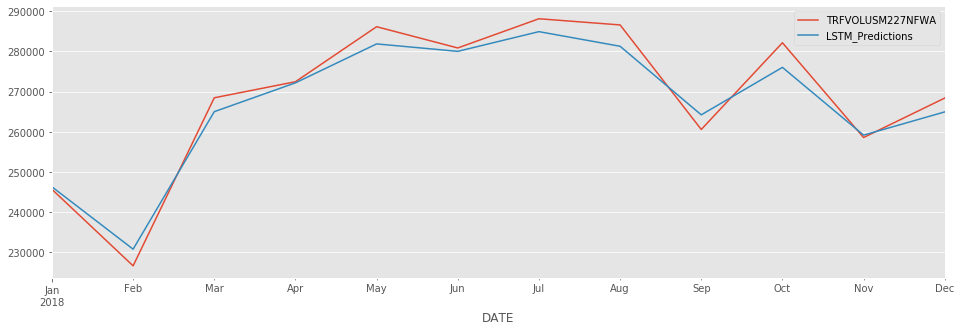

In [31]:
test['TRFVOLUSM227NFWA'].plot(figsize = (16,5), legend=True)

test['LSTM_Predictions'].plot(legend = True);

calculate root mean squared error and mean squared error

In [33]:
lstm_rmse_error = rmse(test['TRFVOLUSM227NFWA'], test["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = traveled_data['TRFVOLUSM227NFWA'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 12509944.064595709
RMSE Error: 3536.9399294581904
Mean: 190420.38095238095
